# Rho Statistics

In [34]:
import galsim
import os
import numpy as np
import fitsio
import piff
import matplotlib.pyplot as plt

def setup():
    """Build an input image and catalog used by a few tests below.
    """
    wcs = galsim.TanWCS(
            galsim.AffineTransform(0.26, 0.05, -0.08, -0.24, galsim.PositionD(1024,1024)),
            #galsim.AffineTransform(0.26, 0., 0., 0.26, galsim.PositionD(1024,1024)),
            galsim.CelestialCoord(5 * galsim.arcmin, -25 * galsim.degrees)
            )

    # Make the image (copied from test_single_image in test_simple.py)
    image = galsim.Image(4096, 4096, wcs=wcs)

    # Where to put the stars.
    #x_list = [ 123.12, 345.98, 567.25, 1094.94, 924.15, 1532.74, 1743.11, 888.39, 1033.29, 1409.31 ]
    #y_list = [ 345.43, 567.45, 1094.32, 924.29, 1532.92, 1743.83, 888.83, 1033.19, 1409.20, 123.11 ]
    point_array = np.round(np.random.uniform(33,2015,size=(10000,2)),2)
    
    x_list = point_array[:,0]
    y_list = point_array[:,1]
    # Draw a Gaussian PSF at each location on the image.
    sigma = 2.6
    g1 = 0.23
    g2 = -0.17
    du = 0.09  # in arcsec
    dv = -0.07
    flux = 123.45
    psf = galsim.Gaussian(sigma=sigma).shear(g1=g1, g2=g2).shift(du,dv) * flux
    for x, y in zip(x_list, y_list):
        bounds = galsim.BoundsI(int(x-31), int(x+32), int(y-31), int(y+32))
        offset = galsim.PositionD(x-int(x)-0.5, y-int(y)-0.5)
        psf.drawImage(image=image[bounds], method='no_pixel', offset=offset)
    image.addNoise(galsim.GaussianNoise(rng=galsim.BaseDeviate(1234), sigma=1e-6))
    plt.imshow(image.array)
    plt.show()
    # Write out the image to a file
    image_file = os.path.join('output','test_stats_image.fits')
    image.write(image_file)

    # Write out the catalog to a file
    dtype = [ ('x','f8'), ('y','f8') ]
    data = np.empty(len(x_list), dtype=dtype)
    data['x'] = x_list
    data['y'] = y_list
    cat_file = os.path.join('output','test_stats_cat.fits')
    fitsio.write(cat_file, data, clobber=True)

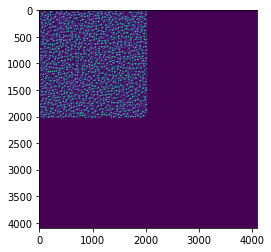

In [35]:
setup()

In [36]:
logger = piff.config.setup_logger(verbose=2)
image_file = os.path.join('output','test_stats_image.fits')
cat_file = os.path.join('output','test_stats_cat.fits')
psf_file = os.path.join('output','test_rhostats.fits')
rho_file = os.path.join('output','test_rhostats.pdf')
config = {
    'input' : {
        'image_file_name' : image_file,
        'cat_file_name' : cat_file,
        'stamp_size' : 48
    },
    'psf' : {
        'model' : { 'type' : 'Gaussian',
                    'fastfit': True,
                    'include_pixel': False },
        'interp' : { 'type' : 'Mean' },
    },
    'output' : {
        'file_name' : psf_file,
        'stats' : {  # Note: stats doesn't have to be a list.
            'type': 'Rho',
            'file_name': rho_file,
            'min_sep': 10,
            'max_sep': 1000,
            'sep_units': 'arcsec',
            'bin_type': 'Linear',
            'bin_size': 30,
        }
    },
}
piff.piffify(config, logger)

# repeat with plotify function
os.remove(rho_file)
piff.plotify(config, logger)

# Test rho statistics directly.
min_sep = 30
max_sep = 600
bin_size = 0.1
psf = piff.read(psf_file)
orig_stars, wcs, pointing = piff.Input.process(config['input'], logger)
stats = piff.RhoStats(min_sep=min_sep, max_sep=max_sep, bin_size=bin_size, sep_units="arcsec")
stats.compute(psf, orig_stars)

rhos = [stats.rho1, stats.rho2, stats.rho3, stats.rho4, stats.rho5]

Reading in 1 images
Getting wcs from image file output/test_stats_image.fits
Setting pointing to image center: -0.001 h, -25.091 d
Reading image file output/test_stats_image.fits
Reading star catalog output/test_stats_cat.fits.
Processing catalog 0 with 10000 stars
Read a total of 10000 stars from 1 image
Building SimplePSF
Failed initializing star at galsim.PositionD(1027.09,1888.24). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(302.84,1913.18). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1939.13,1635.83). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(737.95,1283.09). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(318.22,268.35). Excluding it.
  -- Caught excep

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1502.23,657.42). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(789.33,1539.98). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1770.35,930.91). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1878.45,1321.33). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1846.74,294.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1724.42,920.92). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1609.05,1802.0)

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1858.89,1132.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1046.12,65.19). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1332.91,1671.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(524.61,1095.44). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1042.88,1454.72). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1655.46,99.75). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1187.78,115.28)

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1317.72,674.85). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(2012.98,709.18). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(444.37,1271.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(36.88,1443.32). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1197.35,593.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1737.46,581.04). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1534.51,1466.92).

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1966.14,1447.78). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(115.99,1809.53). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1726.88,341.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(192.93,659.23). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1973.14,1072.59). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(245.93,1545.37). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1134.12,520.69)

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(450.5,1417.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(611.73,1041.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(634.18,1435.77). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(428.04,1192.21). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1280.0,117.73). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(671.74,1540.48). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1769.7,1118.54). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1555.92,1251.76). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1575.91,1110.86). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(888.74,362.3). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(38.05,1283.52). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(158.35,663.59). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1037.42,1146.07). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1076.51,1819.9). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(262.71,938.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(711.01,300.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(661.65,1432.0). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1433.4,1103.24). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(613.93,561.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1544.1,1209.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1174.08,707.52). Exc

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(401.77,1847.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(57.38,143.7). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1985.0,1964.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1739.12,1349.08). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(457.13,1514.48). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(313.26,585.98). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(509.01,853.08). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(267.34,401.75). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1282.84,1818.92). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1748.63,1782.04). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(715.16,1066.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(663.82,1921.13). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1164.87,1928.45). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(944.18,1798.72

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1628.5,34.22). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1662.14,93.62). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(423.38,219.48). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(975.39,108.32). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(481.27,1404.96). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(755.12,1092.84). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1800.52,1401.08). Exc

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1795.65,1985.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1593.69,783.68). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1378.97,1047.67). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1505.9,1411.0). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(973.0,1459.66). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1882.71,1471.29). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(84.35,213.99). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(752.64,123.74). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1002.86,701.5). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(325.25,1994.57). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1612.58,1228.23). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(167.42,1552.67). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1844.57,544.79). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(121.92,1870.69). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1942.55,721.38). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1915.59,1196.55). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1089.99,1043.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1124.96,1401.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(92.94,1015.83). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1761.54,1806.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1674.49,1810.1

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(660.34,454.91). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(873.76,776.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(261.18,1035.0). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(732.62,763.08). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(636.15,1346.27). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1912.66,1672.57). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1379.64,1804.34). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1101.42,245.31). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(949.65,1054.37). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(738.0,609.74). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(236.41,1666.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1462.77,1193.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(663.7,819.26). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(597.65,1520.15). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1944.64,831.87). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1065.95,947.99). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1681.24,424.87). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(905.4,973.7). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1087.63,1140.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1928.91,1724.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(334.65,738.71). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(374.69,497.57). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1457.05,1339.03). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1281.1,775.75). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(899.09,137.49). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(607.17,1402.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(403.49,905.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(556.33,120.93). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(866.31,44.61). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(749.01,1821.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1360.84,1346.86). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(840.33,1532.66). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(779.46,977.96). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1348.78,318.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1583.32,403.53). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1617.27,857.84). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1726.14,1059.18). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1968.25,1384.11). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(2000.74,500.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(886.03,685.94). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1145.53,206.5). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(2012.89,1821.96)

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(858.17,1217.99). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(796.67,212.03). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(677.86,1062.96). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(574.07,363.75). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(103.53,344.9). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1411.53,1688.21). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(362.94,1291.5). Exc

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(932.9,1421.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(652.27,455.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(405.81,1709.15). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1908.32,793.31). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1006.11,1296.16). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1785.22,274.62). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1473.81,1653.12).

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1997.89,1416.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(938.35,418.44). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1696.86,1032.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(153.75,1188.16). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(97.67,68.72). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(392.92,183.02). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(324.54,670.54). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(560.63,280.64). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1178.55,853.32). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(506.13,120.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(241.66,409.44). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(458.58,1420.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(405.73,1930.52). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1908.72,1829.34). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(895.17,554.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1013.24,400.27). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1009.46,1773.76). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1427.05,1469.45). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1222.89,334.22). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1024.17,346.63). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1145.61,653.31)

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(197.48,145.28). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(2008.82,184.73). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(822.24,640.77). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1524.98,942.2). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1378.22,513.58). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(52.97,770.44). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1165.46,364.83). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(679.13,1914.1). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1432.21,1023.15). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1903.56,1984.31). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(93.0,314.79). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(614.17,866.68). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1660.41,1649.39). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(733.58,185.55). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(886.89,990.04). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1385.1,729.8). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1931.89,1270.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(168.68,396.21). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(314.72,1853.61). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1055.29,1739.63). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(262.47,1262.23). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(546.02,1504.28). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1494.79,1148.64). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1034.91,1169.68). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1783.82,518.85). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1597.27,798.33). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(447.62,153.67). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(534.92,2008.74)

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1184.55,1112.3). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1683.82,576.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(852.48,914.48). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1916.04,1404.83). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1699.22,947.1). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(799.36,708.53). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1078.45,78.83). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(693.72,725.13). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(893.75,1168.4). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1599.42,1125.23). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1263.06,1877.0). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1070.84,1207.93). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(633.26,1869.38). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(350.64,1692.76).

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1772.22,661.76). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1748.15,849.97). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1606.97,1319.81). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1665.28,839.91). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(494.13,686.32). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(880.48,1955.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1195.1,442.98). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1663.95,642.52). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1422.08,1902.06). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(770.21,243.77). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(724.88,381.13). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(623.15,337.64). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(953.35,317.2). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(672.27,368.9). Exclu

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(360.6,706.8). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1025.59,1752.23). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(981.51,524.49). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1344.62,551.98). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(763.75,54.61). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1402.9,43.31). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1535.47,1394.19). Exclu

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(309.21,243.72). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1161.66,772.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1976.83,407.61). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1664.57,478.39). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1659.35,1503.66). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1334.71,149.66). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1841.63,306.33).

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1811.48,1073.14). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(822.37,1142.05). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(97.36,1438.86). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(271.94,1901.3). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(998.71,216.42). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1360.14,597.28). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1537.3,499.01). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(735.25,1031.45). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1256.32,820.76). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1585.9,104.62). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(974.33,1997.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(586.35,912.8). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1702.6,1179.76). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1822.15,320.08). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1218.03,818.88). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(802.78,953.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1829.71,249.34). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1109.45,1036.78). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(385.17,937.64). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(74.66,1789.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1223.6,1579.46). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(941.08,1800.83). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1238.14,860.05). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(86.96,1513.63). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1131.87,406.31). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(822.17,850.18). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1720.96,197.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1921.85,1176.6). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1401.21,570.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1757.8,1295.27). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(689.47,1952.85). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(980.11,97.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(613.03,479.52). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1252.99,82.26). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1394.63,1444.73). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1941.15,720.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(378.35,1328.75). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(511.12,89.86). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(45.63,1682.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(182.37,1350.04). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1785.35,1564.76). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1931.82,1620.34). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(822.11,1480.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(705.76,1063.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1106.89,1247.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(90.32,343.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(452.14,859.48). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(435.84,851.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1725.72,1971.85). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1528.56,358.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(184.33,669.25). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(791.51,399.43). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1558.07,972.28). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1541.03,689.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1547.04,1935.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1671.2,1912.38). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1462.24,1790.52). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1626.4,191.41). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(387.44,452.94). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(250.35,596.41). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(410.25,1942.02). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(542.61,592.97). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(780.11,45.39). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1963.77,732.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(40.4,1627.62). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1049.59,296.3). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1846.11,1538.5). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1543.31,777.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(575.25,408.63). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(435.38,187.94). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1211.72,333.21). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(652.93,1792.75). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(644.37,1310.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(952.94,1194.67). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(391.66,437.8). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1422.61,46.95). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(165.25,813.93). Exc

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1058.53,535.27). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(121.34,820.96). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(723.73,1636.89). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1747.33,302.3). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1163.02,1462.79). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(153.46,1715.16). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(452.39,1411.37). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(393.55,730.39). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1875.22,1350.32). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(924.06,1050.4). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(989.71,1189.25). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1914.13,859.66). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(205.9,1624.27). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1356.27,1159.06). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(237.21,1031.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(605.34,1660.98). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(123.81,830.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(83.34,300.94). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(263.69,1594.64). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(600.1,1585.47). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(600.64,450.17). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1187.04,1826.53). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(804.95,2001.2). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1100.28,527.17). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(984.46,1988.86). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(428.87,1066.0). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1198.18,970.77). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1399.15,587.88). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(917.63,93.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(626.08,561.01). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(112.42,699.98). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1436.65,1507.74). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1121.42,134.34). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1715.74,210.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(690.55,1809.32). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(782.91,1233.94). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1602.54,1444.17). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1897.56,1896.25). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(243.1,268.25). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(184.25,1424.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1625.61,980.82). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1030.5,1513.91).

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(370.16,943.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(115.81,1902.88). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(489.4,1693.29). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(604.92,895.48). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(965.9,39.07). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1014.94,470.44). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1016.79,1322.62). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1633.64,775.53). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1418.43,1974.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(655.61,446.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1902.76,232.14). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1190.35,905.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1756.05,1907.58). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(900.88,948.58). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(747.77,1205.19). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(829.21,395.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(41.9,609.66). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1366.69,1347.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1791.9,1432.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(473.93,596.64). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(306.69,1416.4). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(291.71,1067.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(490.6,1101.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(635.2,154.13). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(573.76,1264.28). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(107.49,899.55). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(588.06,1538.58). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1435.45,1528.12). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(526.11,844.3). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(160.0,1471.51). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1671.92,1786.27). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(157.31,608.45). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1926.31,702.88). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(233.02,1124.38). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1736.51,1306.43). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(488.43,917.89). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1548.74,1757.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(260.92,341.88). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(995.13,1016.08). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1442.35,1199.8). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1911.01,1124.18). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(860.27,184.34). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1935.15,1190.16). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1540.55,1882.17). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(852.21,1508.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1364.14,454.46). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1182.66,1216.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1917.87,927.13). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1110.59,1894.2

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(906.47,1776.78). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1774.19,367.89). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1380.16,104.96). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(96.44,214.7). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1564.08,1219.15). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1307.3,1697.78). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(142.96,995.63). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(532.79,1404.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(44.27,1329.99). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1703.18,221.91). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1637.04,1437.92). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1766.85,788.72). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(567.46,92.16). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1659.95,1425.56). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1523.57,1892.49). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1364.07,1892.42). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(156.9,1559.94). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1423.75,1497.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1661.43,97.7). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(472.8,654.14). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(794.01,1417.86). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(909.48,2004.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1857.51,1320.87). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(184.5,605.72). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(276.56,1412.3). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(744.43,1315.44). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1961.13,1145.36). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(280.14,894.62). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1198.74,1572.88). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(203.37,212.32). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1710.04,1161.7). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1085.27,518.93). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1859.65,641.55). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1178.94,1888.35). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1705.68,1484.08

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1813.14,1864.96). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1035.3,721.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(713.6,498.41). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(711.57,377.26). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1012.94,1632.93). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(600.31,449.11). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(973.05,783.46). Exc

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(297.28,1791.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(716.11,1196.99). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1588.56,1066.39). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(943.83,279.6). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(281.08,351.87). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1273.83,301.07). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(261.9,427.74). Exc

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(962.86,1347.04). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1780.4,1523.49). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1127.6,261.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(753.23,1035.76). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1977.83,474.1). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1489.5,192.49). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(501.11,288.07). Exc

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1620.28,105.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(498.39,1666.69). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(994.55,275.9). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1433.1,1654.24). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1104.66,1185.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1276.22,1481.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(195.3,1580.5). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(682.41,329.09). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1335.2,690.72). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1223.46,1533.58). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1118.46,514.94). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1340.22,190.33). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(75.57,1929.22). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(919.43,1268.08). E

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1404.88,822.93). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(527.15,1715.65). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(246.38,292.14). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1436.12,1802.09). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1619.12,1852.24). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1910.89,246.45). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(851.26,979.2). 

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(2004.79,652.05). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1171.62,706.94). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(970.34,1060.56). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1084.76,1469.09). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1363.57,621.31). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1375.02,1443.15). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1747.78,519.46

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(258.14,531.18). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(248.17,1767.89). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1401.13,591.78). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(297.52,1930.06). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(757.65,833.9). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(760.69,1924.18). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1406.9,1471.58). Ex

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1632.35,1385.03). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(296.36,1741.86). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(265.73,547.27). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(881.1,206.53). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(628.24,196.59). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(747.03,284.71). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(197.51,887.96). Excl

  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1863.31,1747.24). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(582.54,860.5). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(203.11,282.45). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1255.0,263.44). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(500.23,1192.02). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(227.21,282.12). Excluding it.
  -- Caught exception: Error initializing star fit values using hsm.
Failed initializing star at galsim.PositionD(1095.58,858.23). Exc

Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1498.0,1214.19).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1284.45,852.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1571.88,1752.21).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(849.3,1092.24).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1174.28,1453.49).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
             Total chisq = 8491.21 

Failed fitting star at galsim.PositionD(1510.54,1605.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(515.07,1976.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1855.6,1635.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(978.06,392.34).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(805.6,195.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1306.54,1099.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posit

Failed fitting star at galsim.PositionD(1848.59,1848.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1918.85,531.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1571.88,1752.21).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(159.47,1522.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(307.74,1926.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(561.68,1543.51).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Pos

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(788.12,728.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1664.48,1013.66).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1066.53,1523.77).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(70.44,486.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.72,530.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(241.38,1081.83).
Excluding it from this iteration.
  -- Caught exception: Error calcul

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1284.45,852.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1444.0,640.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(58.01,1930.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1848.59,1848.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1918.85,531.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1571.88,1752.21).
Excluding it from this iteration.
  -- Caught exception: Error calcula

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.59,1992.89).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1604.88,1050.15).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(978.06,392.34).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1238.18,1972.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(805.6,195.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1306.54,1099.32).
Excluding it from this iteration.


Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(236.69,1172.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(586.65,394.94).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1897.89,1918.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(709.84,602.15).
Excluding it from this iteration.
  

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1703.57,1596.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1069.83,950.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1698.68,486.23).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(619.85,1306.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1300.32,1412.63).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1440.43,1046.68).
Excluding it from this iteration.
  -- Caught exception: Error cal

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1238.18,1972.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(805.6,195.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1306.54,1099.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1009.29,1351.05).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1068.36,1644.49).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(948.82,1990.33).
Excluding it from this iteration

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1211.37,902.28).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(2002.29,1565.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(785.21,1519.71).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.49,1017.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(236.69,1172.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1918.85,531.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1571.88,1752.21).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(671.99,1891.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(159.47,1522.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(307.74,1926.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1263.4,1488.13).
Excluding it from this iteration.


Failed fitting star at galsim.PositionD(104.46,1125.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1381.4,1328.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(421.13,256.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(931.44,291.62).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(650.05,101.66).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1712.6,1022.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

Failed fitting star at galsim.PositionD(1077.05,492.99).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(760.15,67.42).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1968.21,85.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1765.1,1963.24).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1615.66,1969.88).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1270.32,866.61).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

Failed fitting star at galsim.PositionD(1279.22,1336.42).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(653.44,113.51).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(714.71,131.64).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(409.06,1866.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(244.48,635.26).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1957.81,1640.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posit

Failed fitting star at galsim.PositionD(358.11,709.28).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(757.49,363.9).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(517.88,1509.18).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1853.96,1482.16).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(836.62,1856.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1618.51,365.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1238.18,1972.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(38.95,1012.82).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1682.73,106.23).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(363.27,87.51).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(805.6,195.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1306.54,1099.32).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1260.37,1657.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(238.87,1081.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(812.91,1319.36).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1776.11,368.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(258.9,1263.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1153.71,1972.16).
Excluding it from this iteration.
  -- Caught exception: Error calcu

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(341.67,1735.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(274.65,1753.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1085.45,367.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1863.88,1171.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1161.82,1822.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1717.92,983.37).
Excluding it from this iteration.
  -- Caught exception: Error calc

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1887.92,1508.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1887.7,1517.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(712.02,1300.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.7,70.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(280.57,542.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1461.62,1068.44).
Excluding it from this iteration.
  -- Caught exception: Error calculati

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1238.18,1972.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(38.95,1012.82).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1682.73,106.23).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(363.27,87.51).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(805.6,195.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1306.54,1099.32).
Excluding it from this iteration.
  -

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(480.8,1254.7).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1684.13,1013.36).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1294.86,726.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1260.37,1657.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(238.87,1081.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(812.91,1319.36).
Excluding it from this iteration.
 

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(902.64,615.64).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1665.43,117.55).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(568.29,160.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(335.54,122.11).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.81,455.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(360.14,1385.35).
Excluding it from this iteration.
  --

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1069.83,950.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1698.68,486.23).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(619.85,1306.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1300.32,1412.63).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1440.43,1046.68).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1174.28,1453.49).
Excluding it from this iteration

Failed fitting star at galsim.PositionD(364.46,1767.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1479.14,1395.34).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1649.09,697.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(104.46,1125.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1381.4,1328.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(421.13,256.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posit

Failed fitting star at galsim.PositionD(1066.53,1523.77).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(850.78,1593.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(637.4,1745.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(70.44,486.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.72,530.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(241.38,1081.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

Failed fitting star at galsim.PositionD(75.46,722.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(709.84,602.15).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1526.95,388.62).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1143.84,940.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(591.48,657.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(103.4,744.59).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(

Failed fitting star at galsim.PositionD(458.44,687.8).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(402.64,1859.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1918.85,531.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1042.9,480.82).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1571.88,1752.21).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(99.49,1104.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

Failed fitting star at galsim.PositionD(1321.95,369.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1887.92,1508.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1887.7,1517.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(712.02,1300.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.7,70.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(280.57,542.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1510.54,1605.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(91.92,1528.12).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(576.26,1222.46).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.76,1190.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(315.87,816.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1319.6,363.78).
Excluding it from this iteration.
  -- Caught exception: Error calcula

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(234.16,932.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1018.93,1646.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(713.25,749.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1406.89,1833.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1901.27,835.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(132.1,691.9).
Excluding it from this iteration.
  -- Caught exception: Error calculati

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(544.5,1942.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(370.92,1000.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1400.31,884.55).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(796.74,1579.88).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(701.94,252.38).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1149.85,956.37).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1571.88,1752.21).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(99.49,1104.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1459.5,351.37).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(671.99,1891.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(159.47,1522.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1336.01,1119.84).
Excluding it from this iteration.
  -- Caught exception: Error calcul

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(712.02,1300.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.7,70.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(280.57,542.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1461.62,1068.44).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.46,237.19).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(740.48,257.04).
Excluding it from this iteration.
  -- Caught exception: Error calculating

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(91.92,1528.12).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(576.26,1222.46).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.76,1190.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(315.87,816.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1319.6,363.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1202.27,508.31).
Excluding it from this iteration.
  -

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1399.09,221.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(356.02,45.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(234.16,932.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1018.93,1646.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(713.25,749.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1406.89,1833.32).
Excluding it from this iteration.
  -

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(591.48,657.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(103.4,744.59).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1612.86,257.38).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(544.5,1942.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(370.92,1000.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1400.31,884.55).
Excluding it from this iteration.
  -- 

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(58.01,1930.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1848.59,1848.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(458.44,687.8).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(661.5,1235.84).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(402.64,1859.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1918.85,531.83).
Excluding it from this iteration.
  --

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1853.96,1482.16).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(925.19,168.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(836.62,1856.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1451.06,508.94).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1618.51,365.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1321.95,369.4).
Excluding it from this iteration.
 

Failed fitting star at galsim.PositionD(364.46,1767.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1479.14,1395.34).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1649.09,697.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(104.46,1125.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1381.4,1328.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(421.13,256.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posit

Failed fitting star at galsim.PositionD(860.67,1166.5).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1267.26,1520.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(788.12,728.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1664.48,1013.66).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1851.96,1045.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1066.53,1523.77).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Po

Failed fitting star at galsim.PositionD(1576.98,313.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(785.21,1519.71).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.49,1017.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(236.69,1172.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posi

Failed fitting star at galsim.PositionD(2011.66,557.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(274.65,1753.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1085.45,367.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1863.88,1171.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1161.82,1822.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1878.96,1080.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Po

Failed fitting star at galsim.PositionD(1698.68,486.23).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(619.85,1306.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1300.32,1412.63).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(165.65,1708.21).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1440.43,1046.68).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1414.83,1476.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.P

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1523.95,302.29).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1298.87,1239.0).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1454.58,644.67).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1106.59,544.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1565.45,836.61).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1707.35,1173.32).
Excluding it from this iteration.
  -- Caught exception: Error calc

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1149.62,1123.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1052.25,161.63).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1150.11,1261.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(294.74,152.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1346.0,765.68).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1868.21,1533.37).
Excluding it from this iteration.
  -- Caught exception: Error calc

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(812.91,1319.36).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(471.84,1657.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1776.11,368.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1457.81,1752.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(258.9,1263.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(366.48,167.86).
Excluding it from this iteration.
  -- Caught exception: Error calcul

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(916.55,614.28).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(409.06,1866.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(244.48,635.26).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1957.81,1640.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(902.64,615.64).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1665.43,117.55).
Excluding it from this iteration.
  -- Caught exception: Error calcula

Failed fitting star at galsim.PositionD(1112.66,1083.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.3,1629.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1194.04,509.79).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1102.15,506.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1699.41,1970.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(202.78,584.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posi

Failed fitting star at galsim.PositionD(1411.7,1986.75).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(242.87,1624.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1861.7,511.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(188.84,187.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1380.94,481.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(735.98,547.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1855.6,1635.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1857.82,156.04).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.59,1992.89).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1604.88,1050.15).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1471.49,109.66).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(978.06,392.34).
Excluding it from this iteration.
  -- Caught exception: Error calcu

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(132.1,691.9).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(104.89,1016.57).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1077.05,492.99).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(760.15,67.42).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1968.21,85.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1765.1,1963.24).
Excluding it from this iteration.
  -- Caught exception: Error calculating 

Failed fitting star at galsim.PositionD(1400.31,884.55).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(796.74,1579.88).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(701.94,252.38).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1149.85,956.37).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(341.71,72.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(389.6,2012.63).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD

Failed fitting star at galsim.PositionD(191.98,701.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(661.5,1235.84).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(402.64,1859.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1918.85,531.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1042.9,480.82).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1571.88,1752.21).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

Failed fitting star at galsim.PositionD(1010.11,166.9).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1853.96,1482.16).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(925.19,168.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(836.62,1856.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1004.36,70.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1451.06,508.94).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(869.61,1787.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1546.07,929.57).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(331.15,927.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(364.46,1767.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1708.06,1188.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1479.14,1395.34).
Excluding it from this iteration.
  -- Caught exception: Error calcu

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1524.99,1051.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1881.78,993.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(558.68,1713.26).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(635.42,586.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(689.31,1879.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(860.67,1166.5).
Excluding it from this iteration.
  -- Caught exception: Error calcula

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1153.71,1972.16).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1265.69,443.49).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1350.79,34.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(35.83,1145.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(47.01,1576.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1445.82,1571.9).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1665.43,117.55).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(568.29,160.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(335.54,122.11).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.81,455.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(393.62,139.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(360.14,1385.35).
Excluding it from this iteration.
  -- Caught exception: Error calculati

Failed fitting star at galsim.PositionD(1102.15,506.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1699.41,1970.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(202.78,584.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(256.14,405.35).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(72.53,889.58).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(913.35,620.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Position

Failed fitting star at galsim.PositionD(1307.34,1219.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(295.21,583.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1411.7,1986.75).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(242.87,1624.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1861.7,511.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(188.84,187.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1455.25,633.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(515.07,1976.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1855.6,1635.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1857.82,156.04).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.59,1992.89).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1604.88,1050.15).
Excluding it from this iteration.
  -- Caught exception: Error calc

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(713.25,749.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1406.89,1833.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1901.27,835.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(132.1,691.9).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(104.89,1016.57).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1077.05,492.99).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1143.84,940.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(591.48,657.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(103.4,744.59).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1612.86,257.38).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(544.5,1942.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(370.92,1000.3).
Excluding it from this iteration.
  -- Caught exception: Error calculatin

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(337.5,1397.82).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(543.61,292.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(176.17,1426.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(58.01,1930.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1848.59,1848.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(458.44,687.8).
Excluding it from this iteration.
  -- Caught exception: Error calculatin

Failed fitting star at galsim.PositionD(1440.43,1046.68).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1414.83,1476.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1174.28,1453.49).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(884.27,780.5).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(358.11,709.28).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1633.81,698.42).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posi

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1523.95,302.29).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1298.87,1239.0).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1454.58,644.67).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1106.59,544.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1565.45,836.61).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1707.35,1173.32).
Excluding it from this iteration.
  -- Caught exception: Error calc

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(948.82,1990.33).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1931.55,1441.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1149.62,1123.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1052.25,161.63).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1150.11,1261.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(294.74,152.93).
Excluding it from this iteration.
  -- Caught exception: Error cal

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(480.8,1254.7).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1684.13,1013.36).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1294.86,726.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1260.37,1657.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(238.87,1081.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(812.91,1319.36).
Excluding it from this iteration.
  -- Caught exception: Error calcul

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1930.51,1424.84).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(120.07,440.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1693.77,1293.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1243.46,1752.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(626.34,1312.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1412.13,1477.05).
Excluding it from this iteration.
  -- Caught exception: Error cal

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1459.5,351.37).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(671.99,1891.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(979.1,148.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(159.47,1522.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1336.01,1119.84).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(307.74,1926.02).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(836.62,1856.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1004.36,70.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1451.06,508.94).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1618.51,365.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1321.95,369.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1887.92,1508.93).
Excluding it from this iteration.
  -- Caught exception: Error calcul

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(364.46,1767.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1708.06,1188.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1479.14,1395.34).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1649.09,697.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(104.46,1125.01).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1381.4,1328.45).
Excluding it from this iteration.


Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(558.68,1713.26).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(635.42,586.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(689.31,1879.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(860.67,1166.5).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1267.26,1520.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(788.12,728.02).
Excluding it from this iteration.
  

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(258.9,1263.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(366.48,167.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1153.71,1972.16).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1265.69,443.49).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1350.79,34.2).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(343.64,1235.97).
Excluding it from this iteration.
  -

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(280.89,1772.51).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(916.55,614.28).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(409.06,1866.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(244.48,635.26).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1957.81,1640.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(902.64,615.64).
Excluding it from this iteration.
  

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(318.43,1927.18).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1263.4,1488.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(561.68,1543.51).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(569.26,885.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(111.91,407.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(849.3,1092.24).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(712.02,1300.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.7,70.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(280.57,542.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1712.32,1006.29).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1461.62,1068.44).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.46,237.19).
Excluding it from this iteration.
  -- Caught exception: Error calculati

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(931.44,291.62).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1615.4,1030.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(650.05,101.66).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1712.6,1022.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1510.54,1605.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(91.92,1528.12).
Excluding it from this iteration.
  

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1851.96,1045.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1371.71,804.0).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.0,1999.03).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1066.53,1523.77).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(850.78,1593.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1116.73,919.91).
Excluding it from this iteration.

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(47.01,1576.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1445.82,1571.9).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1565.01,912.82).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1211.37,902.28).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(2002.29,1565.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1576.98,313.65).
Excluding it from this iteration.
  -- Caught exception: Error calcu

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(568.29,160.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(335.54,122.11).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.81,455.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(393.62,139.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(360.14,1385.35).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(348.33,1407.62).
Excluding it from this iteration.
  -- Caught exception: Error calculati

Failed fitting star at galsim.PositionD(975.28,147.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1112.66,1083.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.3,1629.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1194.04,509.79).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1102.15,506.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1699.41,1970.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posi

Failed fitting star at galsim.PositionD(740.48,257.04).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1472.95,1206.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1860.04,1382.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(110.39,1197.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(272.57,536.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1159.98,1594.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Pos

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(91.92,1528.12).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(576.26,1222.46).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.76,1190.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(315.87,816.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1319.6,363.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1202.27,508.31).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1116.73,919.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(637.4,1745.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(70.44,486.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.72,530.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(241.38,1081.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1399.09,221.91).
Excluding it from this iteration.
  -- Caught exception: Error calculat

Failed fitting star at galsim.PositionD(1576.98,313.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(785.21,1519.71).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1675.31,948.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.49,1017.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(236.69,1172.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Pos

Failed fitting star at galsim.PositionD(348.33,1407.62).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(131.91,594.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(341.67,1735.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(2011.66,557.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1570.8,67.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(274.65,1753.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(202.78,584.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(256.14,405.35).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(72.53,889.58).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(913.35,620.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(932.02,1220.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1101.13,1883.08).
Excluding it from this iteration.
  --

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1159.98,1594.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1307.34,1219.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(295.21,583.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1411.7,1986.75).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(242.87,1624.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1861.7,511.47).
Excluding it from this iteration.


Failed fitting star at galsim.PositionD(315.87,816.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1319.6,363.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1202.27,508.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(264.33,528.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1455.25,633.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1630.75,37.85).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Position

Failed fitting star at galsim.PositionD(70.44,486.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.72,530.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(241.38,1081.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1399.09,221.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(356.02,45.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(234.16,932.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.49,1017.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(236.69,1172.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(121.61,1377.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(586.65,394.94).
Excluding it from this iteration.
 

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(341.67,1735.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(2011.66,557.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1570.8,67.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(274.65,1753.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1085.45,367.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1691.42,1752.06).
Excluding it from this iteration.
 

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(256.14,405.35).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(72.53,889.58).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(913.35,620.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(932.02,1220.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1101.13,1883.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(540.79,1773.91).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1307.34,1219.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(295.21,583.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1411.7,1986.75).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(242.87,1624.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1861.7,511.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(188.84,187.76).
Excluding it from this iteration.
  -- Caught exception: Error calcula

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(264.33,528.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1455.25,633.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1630.75,37.85).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(515.07,1976.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1855.6,1635.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1857.82,156.04).
Excluding it from this iteration.
  

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1399.09,221.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(356.02,45.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(234.16,932.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1018.93,1646.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(713.25,749.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1406.89,1833.32).
Excluding it from this iteration.
  -

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(121.61,1377.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(586.65,394.94).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1897.89,1918.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(75.46,722.25).
Excluding it from this iteration.
  -

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1570.8,67.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(274.65,1753.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1085.45,367.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1691.42,1752.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1863.88,1171.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1161.82,1822.4).
Excluding it from this iteration.


  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(913.35,620.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(932.02,1220.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1101.13,1883.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(540.79,1773.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.07,67.96).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(491.59,616.29).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1411.7,1986.75).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(242.87,1624.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1861.7,511.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(188.84,187.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1380.94,481.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(735.98,547.07).
Excluding it from this iteration.
  -- Caught exception: Error calculat

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1630.75,37.85).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(515.07,1976.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1855.6,1635.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1857.82,156.04).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.59,1992.89).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1604.88,1050.15).
Excluding it from this iteration.


Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(234.16,932.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1018.93,1646.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(713.25,749.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1406.89,1833.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1901.27,835.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(132.1,691.9).
Excluding it from this iteration.
  --

Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(586.65,394.94).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1897.89,1918.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(75.46,722.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(709.84,602.15).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1526.95,388.62).
Excluding it from this iteration.
  --

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1085.45,367.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1691.42,1752.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1863.88,1171.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1161.82,1822.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1878.96,1080.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1717.92,983.37).
Excluding it from this iteration.
  -- Caught exception: Error ca

Failed fitting star at galsim.PositionD(932.02,1220.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1101.13,1883.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(540.79,1773.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.07,67.96).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(491.59,616.29).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1703.57,1596.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posit

Failed fitting star at galsim.PositionD(242.87,1624.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1861.7,511.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(188.84,187.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1380.94,481.81).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(735.98,547.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(921.44,654.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Position

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1630.75,37.85).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(515.07,1976.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1855.6,1635.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1857.82,156.04).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.59,1992.89).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1604.88,1050.15).
Excluding it from this iteration.
  -- Caught exception: Error calcu

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(356.02,45.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(234.16,932.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1018.93,1646.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(713.25,749.87).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1406.89,1833.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1901.27,835.07).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(121.61,1377.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(586.65,394.94).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1897.89,1918.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(75.46,722.25).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(2011.66,557.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1570.8,67.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(274.65,1753.56).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1085.45,367.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1691.42,1752.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1863.88,1171.91).
Excluding it from this iteration.
  -- Caught exception: Error calcu

Failed fitting star at galsim.PositionD(256.14,405.35).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(72.53,889.58).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(913.35,620.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(932.02,1220.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1101.13,1883.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(540.79,1773.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

Failed fitting star at galsim.PositionD(1307.34,1219.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(295.21,583.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1411.7,1986.75).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(242.87,1624.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1861.7,511.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(188.84,187.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(264.33,528.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1455.25,633.73).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1630.75,37.85).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(515.07,1976.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1855.6,1635.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1857.82,156.04).
Excluding it from this iteration.
  -- Caught exception: Error calcula

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(241.38,1081.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1399.09,221.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(356.02,45.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(234.16,932.14).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1018.93,1646.3).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(713.25,749.87).
Excluding it from this iteration.
  -- Caught exception: Error calculati

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.49,1017.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(236.69,1172.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1278.89,648.92).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(121.61,1377.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(519.59,776.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(586.65,394.94).
Excluding it from this iteration.
  -- Caught exception: Error calcul

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(504.01,1865.95).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(131.91,594.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(341.67,1735.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(2011.66,557.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1570.8,67.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(274.65,1753.56).
Excluding it from this iteration.
  -- Caught exception: Error calculat

Failed fitting star at galsim.PositionD(1102.15,506.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1699.41,1970.32).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(202.78,584.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(256.14,405.35).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(72.53,889.58).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(913.35,620.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Position

Failed fitting star at galsim.PositionD(110.39,1197.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(272.57,536.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1159.98,1594.22).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1307.34,1219.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(295.21,583.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1411.7,1986.75).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Posi

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.76,1190.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(315.87,816.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1319.6,363.78).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1202.27,508.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(264.33,528.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1455.25,633.73).
Excluding it from this iteration.
  -- Caught exception: Error calculat

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1116.73,919.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(637.4,1745.91).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(70.44,486.25).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.72,530.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(241.38,1081.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1399.09,221.91).
Excluding it from this iteration.
  -- Caught exception: Error calculat

Failed fitting star at galsim.PositionD(2002.29,1565.39).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1576.98,313.65).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(785.21,1519.71).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1675.31,948.09).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.49,1017.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(236.69,1172.86).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Po

Failed fitting star at galsim.PositionD(1935.81,455.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(393.62,139.48).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(360.14,1385.35).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(348.33,1407.62).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(504.01,1865.95).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(131.91,594.02).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

Failed fitting star at galsim.PositionD(849.3,1092.24).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(975.28,147.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1112.66,1083.17).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(731.3,1629.07).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1194.04,509.79).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1102.15,506.41).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positi

Failed fitting star at galsim.PositionD(1461.62,1068.44).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.46,237.19).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(740.48,257.04).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1472.95,1206.08).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1860.04,1382.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(110.39,1197.53).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Pos

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(650.05,101.66).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1712.6,1022.76).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1510.54,1605.31).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(91.92,1528.12).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(576.26,1222.46).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.76,1190.53).
Excluding it from this iteration.
  -- Caught exception: Error calcul

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1851.96,1045.93).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1371.71,804.0).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1100.0,1999.03).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1066.53,1523.77).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(850.78,1593.72).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1116.73,919.91).
Excluding it from this iteration.
  -- Caught exception: Error calc

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(35.83,1145.83).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(47.01,1576.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1445.82,1571.9).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1565.01,912.82).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1211.37,902.28).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(2002.29,1565.39).
Excluding it from this iteration.
  -- Caught exception: Error calcul

  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1957.81,1640.52).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(902.64,615.64).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1665.43,117.55).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(568.29,160.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(335.54,122.11).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1935.81,455.13).
Excluding it from this iteration.
  -- Caught exception: Error calculat

Failed fitting star at galsim.PositionD(318.43,1927.18).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1263.4,1488.13).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(561.68,1543.51).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(569.26,885.06).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(111.91,407.47).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(849.3,1092.24).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

Failed fitting star at galsim.PositionD(1138.39,1468.9).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(712.02,1300.45).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(507.7,70.4).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(280.57,542.43).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1712.32,1006.29).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.PositionD(1461.62,1068.44).
Excluding it from this iteration.
  -- Caught exception: Error calculating model moments for this star.
Failed fitting star at galsim.Positio

/home/thuiop/Documents/stageAPC/Shear-and-PSF-Reading-Group/env/lib64/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/home/thuiop/Documents/stageAPC/Shear-and-PSF-Reading-Group/env/lib64/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


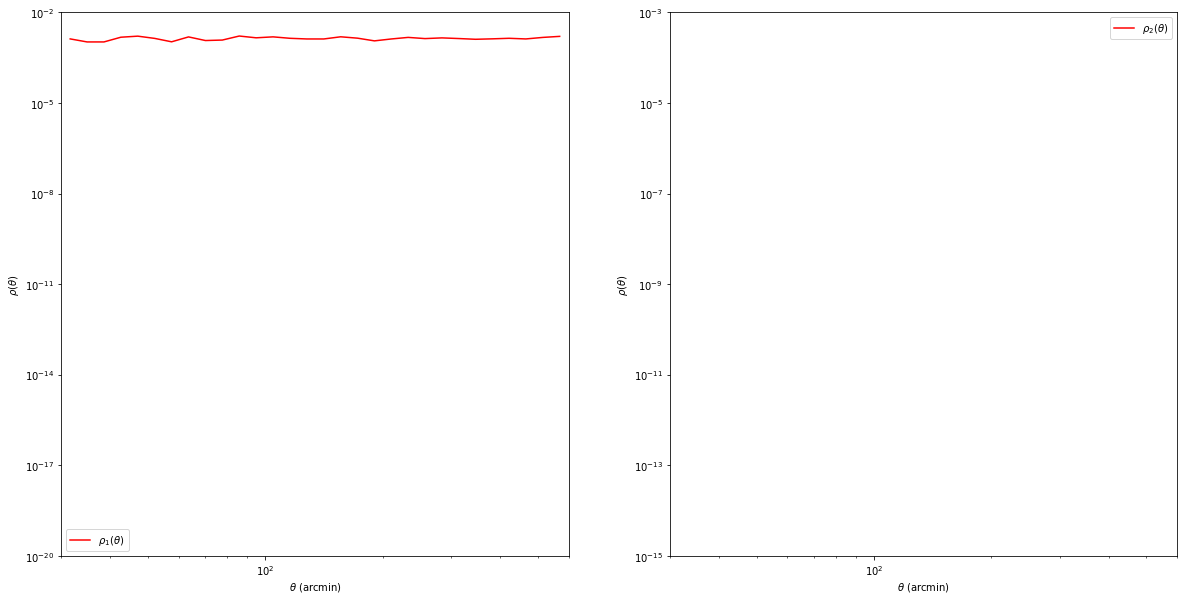

In [37]:
def plot_single(ax, rho, color, marker, offset=0., num=1):
        # Add a single rho stat to the plot.
        meanr = rho.meanr * (1. + rho.bin_size * offset)
        xip = rho.xip
        sig = np.sqrt(rho.varxip)
        ax.plot(meanr, xip, color=color,label=r'$\rho_{}(\theta)$'.format(num))
        ax.plot(meanr, -xip, color=color, ls=':')
        #ax.errorbar(meanr[xip>0], xip[xip>0], yerr=sig[xip>0], color=color, ls='', marker=marker)
        #ax.errorbar(meanr[xip<0], -xip[xip<0], yerr=sig[xip<0], color=color, ls='', marker=marker,
        #            fillstyle='none', mfc='white')
        #return ax.errorbar(-meanr, xip, yerr=sig, color=color, marker=marker)
    
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.set_xlabel(r'$\theta$ (arcmin)')
ax1.set_ylabel(r'$\rho(\theta)$')
ax1.set_xlim(30,600)
ax1.set_xscale('log')
ax1.set_yscale('log', nonposy='clip')
ax1.set_ylim(1.e-20, 1.e-2)
ax2.set_xlabel(r'$\theta$ (arcmin)')
ax2.set_ylabel(r'$\rho(\theta)$')
ax2.set_xlim(30,600)
ax2.set_xscale('log')
ax2.set_yscale('log', nonposy='clip')
ax2.set_ylim(1.e-15, 1.e-3)
plot_single(ax1,rhos[0],"red","x",num=1)
#plot_single(ax1,rhos[2],"blue","x",0.1,num=3)
#plot_single(ax1,rhos[3],"green","x",0.2,num=4)
plot_single(ax2,rhos[1],"red","x",num=2)
#plot_single(ax2,rhos[4],"blue","x",num=5)
ax1.legend()
ax2.legend()
plt.show()

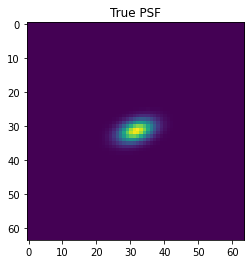

In [38]:
sigma = 2.6
g1 = 0.23
g2 = -0.17
du = 0.09  # in arcsec
dv = -0.07
flux = 123.45
psf = galsim.Gaussian(sigma=sigma).shear(g1=g1, g2=g2).shift(du,dv) * flux
image = galsim.Image(64,64,scale=1.0)
psf.drawImage(image)
plt.imshow(image.array)
plt.title("True PSF")
plt.show()

galsim.Image(bounds=galsim.BoundsI(8,55,8,55), scale=1.0, dtype=numpy.float64)


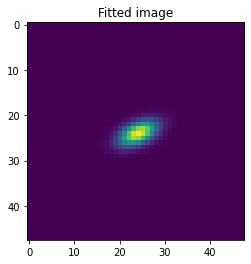

In [39]:
psf = piff.read(psf_file)
star = piff.Star.makeTarget(x=32,y=32)
star = psf.interpolateStar(star)
star = psf._drawStar(star)
print(star.image)
plt.imshow(star.image.array)
plt.title("Fitted image")
plt.show()